In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X=data[['volatile acidity','alcohol']]

In [9]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [2]:
def calculate_mean(cluster,k):
    clusters_array=[[] for _ in range(k)]
    mean_array=[]
    for i in range(len(cluster)):
        _ ,point,centroid_i=cluster[i]
        clusters_array[centroid_i].append(point)


    for i in range(len(clusters_array)):
        mean_array.append(np.mean(np.array(clusters_array[i]),axis=0))

    return mean_array

In [13]:
def k_means(X,k):
    centroids=X[np.random.choice(X.shape[0], k, replace=False)]
    final_clusters=[]
    old_centroids=[]
    threshold=1e-6
    for _ in range(2):
        cluster=[]
        for i in range(len(X)):
            distance_arr=[]
            for centroid in centroids:
                distance_arr.append(euclidean_distance(X[i],centroid))
            
            closest_distance_i=np.argmin(distance_arr)
            cluster.append((distance_arr[closest_distance_i],X[i],closest_distance_i))
        
        centroids=calculate_mean(cluster,k)
        if len(old_centroids)==len(centroids) and np.sum(np.array(centroids)-np.array(old_centroids)) < threshold:
            return centroids,final_clusters
        

        old_centroids=centroids
        final_clusters=cluster

    return centroids,final_clusters

In [10]:
def scatter_plot(centroids,clusters):
    X_coord = np.array([point[1][0] for point in clusters])  # Extract X-coordinates
    Y_coord = np.array([point[1][1] for point in clusters])  # Extract Y-coordinates
    classes = np.array([point[2] for point in clusters])  # Extract class labels

    plt.scatter(X_coord,Y_coord,c=classes,edgecolors='k')
    plt.scatter(centroids[:,0],centroids[:,1],c='red',edgecolors='k',marker='X',label='centroids')
    plt.legend()
    plt.show()

[array([ 0.53272857, 10.29447619]), array([0.56282769, 9.47761414]), array([ 0.45857977, 12.2887808 ]), array([ 0.50324281, 11.08551651])]


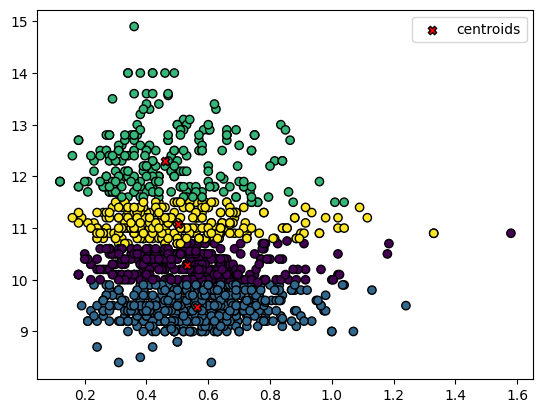

In [14]:
X=np.array(X)

k=int(input('enter how many cluster you want to make:'))

centroids,clusters=k_means(X,k)

print(centroids)

centroids=np.array(centroids)

scatter_plot(centroids=centroids,clusters=clusters)